<a href="https://colab.research.google.com/github/Sakthipooja47/tasks/blob/main/int03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import folium
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/Dataset .csv")

In [ ]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [ ]:
df.rename(columns={'Aggregate rating': 'Rating', 'Latitude': 'lat', 'Longitude': 'lon'}, inplace=True)

In [ ]:
df = df.dropna(subset=['lat', 'lon', 'City', 'Rating'])

In [ ]:
country_mapping = {
    1: 'India', 14: 'Australia', 30: 'Brazil', 37: 'Canada', 94: 'Indonesia',
    148: 'New Zealand', 162: 'Philippines', 166: 'Qatar', 184: 'South Africa',
    189: 'Sri Lanka', 191: 'Turkey', 208: 'United Arab Emirates', 214: 'United Kingdom',
    215: 'United States'
}
df["Country"] = df["Country Code"].map(country_mapping)

In [ ]:
map_center = [df["lat"].mean(), df["lon"].mean()]
restaurant_map = folium.Map(location=map_center, zoom_start=5)

In [ ]:
for _, row in df.iterrows():
    folium.Marker(
        location=[row["lat"], row["lon"]],
        popup=f"{row['Restaurant Name']} - Rating: {row['Rating']}",
        icon=folium.Icon(color="blue" if row["Rating"] > 3 else "red")
    ).add_to(restaurant_map)

In [ ]:
restaurant_map.save("restaurant_map.html")
print("Map saved as restaurant_map.html. Open it in a browser to view.")

Map saved as restaurant_map.html. Open it in a browser to view.


<ipython-input-10-ae9aa6a96dc9>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=city_counts.index, y=city_counts.values, palette="viridis")


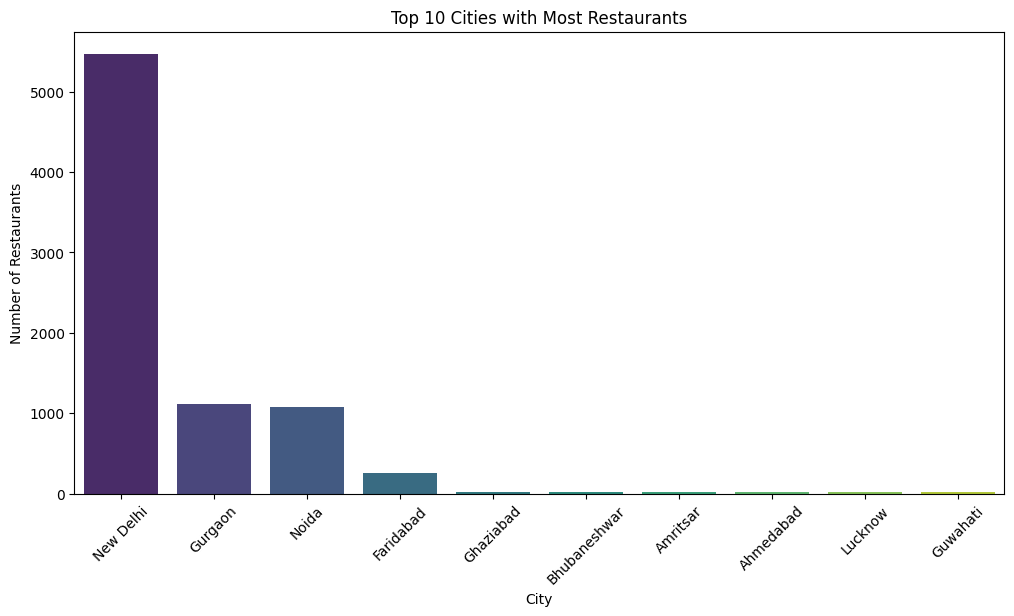

In [ ]:
plt.figure(figsize=(12, 6))
city_counts = df["City"].value_counts().nlargest(10)  # Top 10 cities
sns.barplot(x=city_counts.index, y=city_counts.values, palette="viridis")
plt.xticks(rotation=45)
plt.title("Top 10 Cities with Most Restaurants")
plt.xlabel("City")
plt.ylabel("Number of Restaurants")
plt.show()

In [ ]:
correlation_matrix = df[["lat", "lon", "Rating"]].corr()

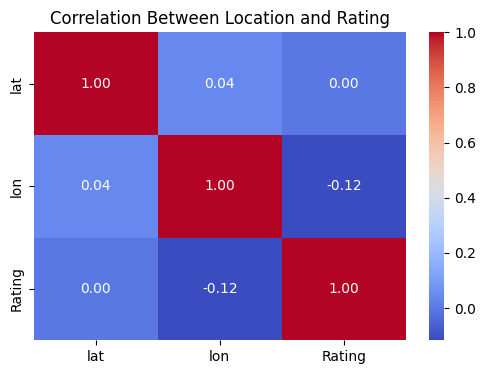

In [ ]:
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Between Location and Rating")
plt.show()